In [38]:
import numpy as np
import pandas as pd
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform


In [39]:
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [2]:
CCTV_Seoul=pd.read_csv("../master/data/01. CCTV_in_Seoul.csv", encoding='utf-8')

In [4]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]:'구별'},inplace=True)
CCTV_Seoul.head(2)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377


In [25]:
pop_Seoul=pd.read_excel("../master/data/01. population_in_Seoul.xls", header=2, encoding='utf-8')
Seouldf=pop_Seoul.rename(columns={pop_Seoul.columns[1]:'구별',pop_Seoul.columns[3]:'인구수',pop_Seoul.columns[6]:'한국인',pop_Seoul.columns[9]:'외국인',pop_Seoul.columns[13]:'고령자'})
Seouldf.head()

,기간,구별,세대,인구수,남자,여자,한국인,남자.1,여자.1,외국인,남자.2,여자.2,세대당인구,고령자
0,2017.1/4,합계,4202888.0,10197604.0,5000005.0,5197599.0,9926968.0,4871560.0,5055408.0,270636.0,128445.0,142191.0,2.36,1321458.0
1,2017.1/4,종로구,72654.0,162820.0,79675.0,83145.0,153589.0,75611.0,77978.0,9231.0,4064.0,5167.0,2.11,25425.0
2,2017.1/4,중구,59481.0,133240.0,65790.0,67450.0,124312.0,61656.0,62656.0,8928.0,4134.0,4794.0,2.09,20764.0
3,2017.1/4,용산구,106544.0,244203.0,119132.0,125071.0,229456.0,111167.0,118289.0,14747.0,7965.0,6782.0,2.15,36231.0
4,2017.1/4,성동구,130868.0,311244.0,153768.0,157476.0,303380.0,150076.0,153304.0,7864.0,3692.0,4172.0,2.32,39997.0


In [19]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [20]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [21]:
CCTV_Seoul['최근증가율']=(CCTV_Seoul['2016년']+CCTV_Seoul['2015년']+\
                         CCTV_Seoul['2014년'])/CCTV_Seoul['2013년도 이전']*100
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [26]:
Seouldf.drop([26], inplace=True)
Seouldf.tail()

,기간,구별,세대,인구수,남자,여자,한국인,남자.1,여자.1,외국인,남자.2,여자.2,세대당인구,고령자
21,2017.1/4,관악구,253826.0,525515.0,264763.0,260752.0,507203.0,256090.0,251113.0,18312.0,8673.0,9639.0,2.00,68082.0
22,2017.1/4,서초구,173856.0,450310.0,216264.0,234046.0,445994.0,214036.0,231958.0,4316.0,2228.0,2088.0,2.57,51733.0
23,2017.1/4,강남구,234107.0,570500.0,273301.0,297199.0,565550.0,270726.0,294824.0,4950.0,2575.0,2375.0,2.42,63167.0
24,2017.1/4,송파구,259883.0,667483.0,325040.0,342443.0,660584.0,321676.0,338908.0,6899.0,3364.0,3535.0,2.54,72506.0
25,2017.1/4,강동구,179676.0,453233.0,225427.0,227806.0,449019.0,223488.0,225531.0,4214.0,1939.0,2275.0,2.50,54622.0


In [27]:
Seouldf['외국인비율']=Seouldf['외국인']/Seouldf['인구수']*100
Seouldf['고령자비율']=Seouldf['고령자']/Seouldf['인구수']*100
Seouldf.head()

,기간,구별,세대,인구수,남자,여자,한국인,남자.1,여자.1,외국인,남자.2,여자.2,세대당인구,고령자,외국인비율,고령자비율
0,2017.1/4,합계,4202888.0,10197604.0,5000005.0,5197599.0,9926968.0,4871560.0,5055408.0,270636.0,128445.0,142191.0,2.36,1321458.0,2.653918,12.958515
1,2017.1/4,종로구,72654.0,162820.0,79675.0,83145.0,153589.0,75611.0,77978.0,9231.0,4064.0,5167.0,2.11,25425.0,5.669451,15.615404
2,2017.1/4,중구,59481.0,133240.0,65790.0,67450.0,124312.0,61656.0,62656.0,8928.0,4134.0,4794.0,2.09,20764.0,6.700690,15.583909
3,2017.1/4,용산구,106544.0,244203.0,119132.0,125071.0,229456.0,111167.0,118289.0,14747.0,7965.0,6782.0,2.15,36231.0,6.038828,14.836427
4,2017.1/4,성동구,130868.0,311244.0,153768.0,157476.0,303380.0,150076.0,153304.0,7864.0,3692.0,4172.0,2.32,39997.0,2.526635,12.850689


In [28]:
data_result = pd.merge(CCTV_Seoul, Seouldf, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,기간,세대,인구수,...,한국인,남자.1,여자.1,외국인,남자.2,여자.2,세대당인구,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,2017.1/4,234107.0,570500.0,...,565550.0,270726.0,294824.0,4950.0,2575.0,2375.0,2.42,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,2017.1/4,179676.0,453233.0,...,449019.0,223488.0,225531.0,4214.0,1939.0,2275.0,2.50,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,2017.1/4,141554.0,330192.0,...,326686.0,160353.0,166333.0,3506.0,1333.0,2173.0,2.31,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,2017.1/4,247696.0,603772.0,...,597248.0,291249.0,305999.0,6524.0,3184.0,3340.0,2.41,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,2017.1/4,253826.0,525515.0,...,507203.0,256090.0,251113.0,18312.0,8673.0,9639.0,2.00,68082.0,3.484582,12.955291


In [32]:
del data_result['남자']
del data_result['여자']
data_result.head(2)

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638


In [37]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


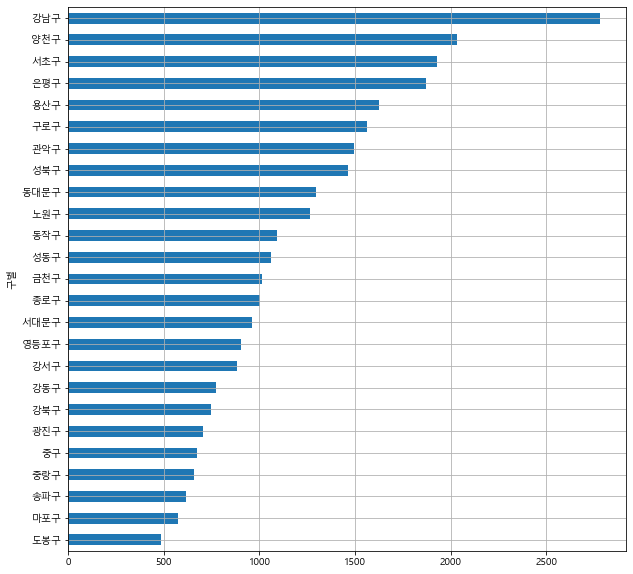

In [41]:
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

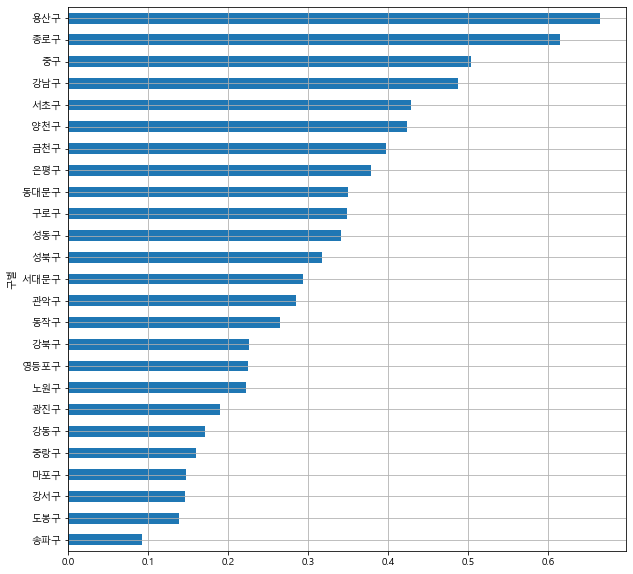

In [44]:
data_result['CCTV비율']=data_result['소계']/data_result['인구수']*100
data_result['CCTV비율'].sort_values().plot(kind='barh',grid=True, figsize=(10,10))
plt.show()

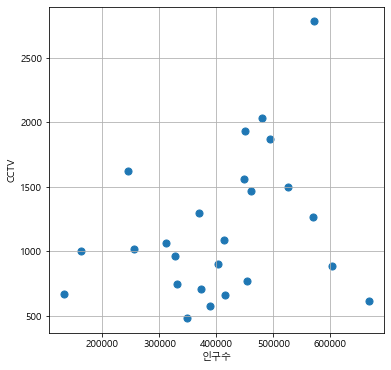

In [45]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [47]:
fp1 = np.polyfit(data_result['인구수'],data_result['소계'],1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [48]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

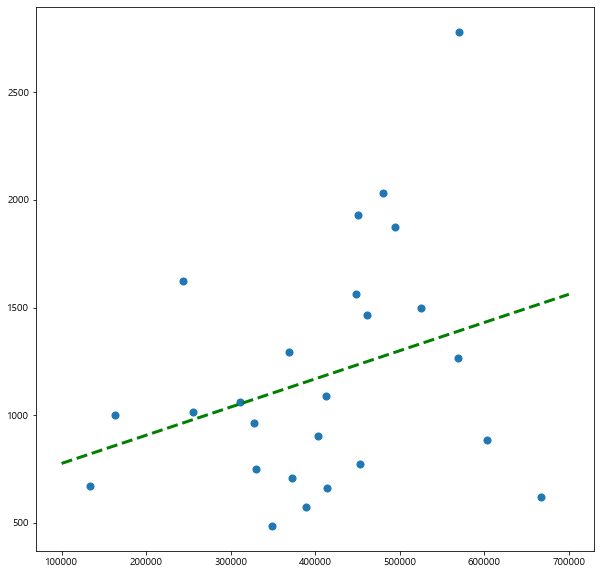

In [49]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')